In [1]:
import sympy as smp
import numpy as np

from scipy.optimize import  curve_fit

import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [2]:
data = planilha_cartolina = pd.read_excel('./dados.xlsx')
g = 9.81

x_data = data["x(0,1cm)"][0:11]
y_data = data["(0,01g)"][0:11]

x_err = 0.1e-2
y_err = g*0.01e-3

x_data = (x_data - 2.9)*1e-2
y_data = (y_data)*g*1e-3

data

,"x(0,1cm)",F,"L(0,1cm)","∆L(0,5cm)",m,"(0,01g)",Unnamed: 6,"L(0,1cm).1","x(0,1cm).1",Unnamed: 9,"d(0,01mm)","b(0,05mm)"
0,2.9,0.0,"29,0m","2,5mm",0.0,0.0,NaN,29,10.5,NaN,0.1,25.25
1,4.1,1.0,NaN,NaN,1.0,65.6,NaN,28,9.7,NaN,NaN,NaN
2,4.9,2.0,NaN,NaN,2.0,109.3,NaN,27,9.0,NaN,NaN,NaN
3,5.6,3.0,NaN,NaN,3.0,151.5,NaN,26,8.5,NaN,NaN,NaN
4,6.4,4.0,NaN,NaN,4.0,194.1,NaN,25,7.8,NaN,NaN,NaN
5,7.1,5.0,NaN,NaN,5.0,236.4,NaN,24,7.2,NaN,NaN,NaN
6,7.8,6.0,NaN,NaN,6.0,280.0,NaN,23,6.6,NaN,NaN,NaN
7,8.5,7.0,NaN,NaN,7.0,322.2,NaN,22,6.1,NaN,NaN,NaN
8,9.1,8.0,NaN,NaN,8.0,364.7,NaN,21,5.6,NaN,NaN,NaN
9,9.8,9.0,NaN,NaN,9.0,413.2,NaN,20,5.2,NaN,NaN,NaN


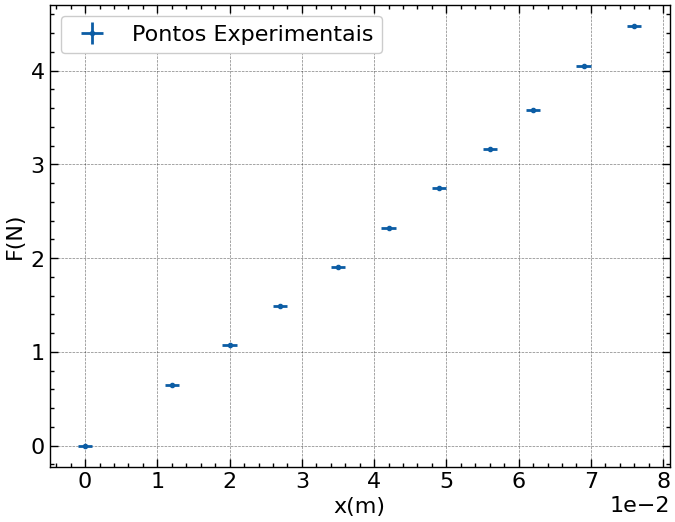

In [3]:
plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3, label ="Pontos Experimentais")

plt.xlabel(r'x(m)')
plt.ylabel(r'F(N)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

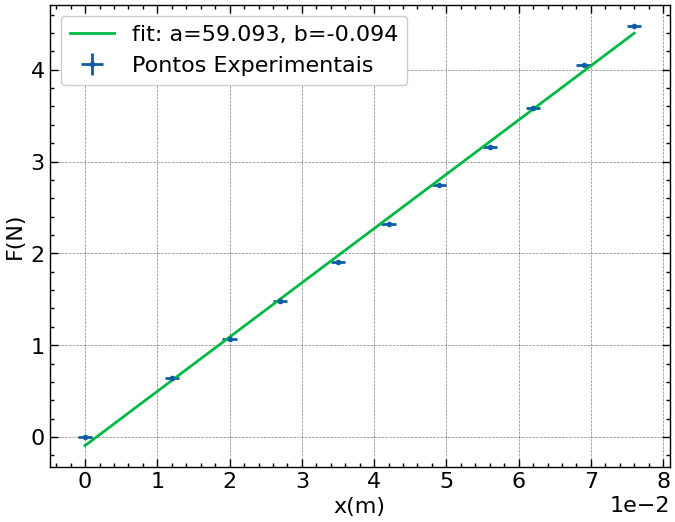

In [4]:
plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3,label ="Pontos Experimentais")

plt.xlabel(r'x(m)')
plt.ylabel(r'F(N)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

def func(x,a, b):
    return a*x + b

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt

plt.plot(x_data, func(x_data, *popt), label='fit: a=%5.3f, b=%5.3f' % tuple(popt) )
plt.legend()